In [1]:
import os
import subprocess
from PIL import Image

dir0 = 'org' 
dir1 = 'png'
dir2 = 'png_resize'

files0 = os.listdir(dir0)
files0.sort()

for file in files0:

    if '.HEIC'  in file:        
        command = 'sips --setProperty format png ' + dir0 +'/' + file +  ' --out ' + dir1 +'/' +  file.replace('.HEIC','.png') 
        subprocess.call(command, shell=True)
        print(file) 

files1 = os.listdir(dir1)
files1.sort()
print('')

for file in files1:
    
    if '.png' in file:   
        img0 = os.path.join(dir1, file)
        img0_img = Image.open(img0)
        img1_img = img0_img.resize((300,300)) 
        img1 = os.path.join(dir2, file) 
        img1_img.save(img1)
        print(file)
        
#define std image, and move to std directory(IMG_0046.png as std image)

IMG_0046.HEIC
IMG_0047.HEIC

IMG_0046.png
IMG_0047.png


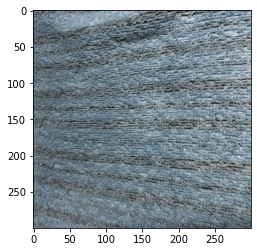

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dir2 = 'png_resize'
files2 = os.listdir(dir2)
files2.sort()

dir3 = 'std'
files3 = os.listdir(dir3)
files3.sort()

std_data2 =[]
image_data2 = []

for file in files2:
   
    if '.png'  in file:        
        img = cv2.imread('./png_resize/' + file)
        plt.imshow(img)
        h, w, c = img.shape    

        v_split = 28
        h_split = 28
        _img = img[:h // v_split * v_split, :w // h_split * h_split]

        image_data =[]
        
        for h_img in np.vsplit(_img, v_split):
            for v_img in np.hsplit(h_img, h_split):  
                b, g, r = cv2.split(v_img)
                value = round(b.mean())/100
                image_data.append(value)
        
        image_data2.append(image_data)

for file in files3:
    
    if '.png'  in file:        
        img = cv2.imread('./std/' + file)
        plt.imshow(img)
        h, w, c = img.shape    

        v_split = 28
        h_split = 28
        _img = img[:h // v_split * v_split, :w // h_split * h_split]

        std_data =[]
        
        for h_img in np.vsplit(_img, v_split):
            for v_img in np.hsplit(h_img, h_split):  
                b, g, r = cv2.split(v_img)
                value = round(b.mean())/100
                std_data.append(value)
                
        std_data2.append(std_data)
   

In [3]:
image_array2 =  np.array(image_data2)
std_array2 = np.array(std_data2)
print(image_array2.shape)
print(std_array2.shape)

(2, 784)
(1, 784)


In [4]:
dif_array = image_array2 - std_array2
dif_array

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.01, -0.1 , -0.09, ...,  0.04,  0.11, -0.03]])

In [5]:
files2p=[]
for file in files2:   
    if '.png'  in file:
        files2p.append(file)
files2p

['IMG_0046.png', 'IMG_0047.png']

In [6]:
dif_data2 =[]
for array in abs(dif_array):
    dif_data=[]
    for value in array:
        if abs(value) > 0.3: #criteria for detection
            value2 = 1
        else:
            value2 = 0
        dif_data.append(value2)
    
    score = round(sum(dif_data)*100/(28*28))        
    dif_data2.append(score)  

In [7]:
for i in range(len(files2p)):
    print(files2p[i]+' : '+str(dif_data2[i]))    

IMG_0046.png : 0
IMG_0047.png : 12


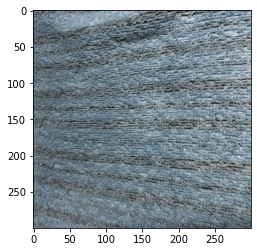

In [8]:
img = cv2.imread('./png_resize/IMG_0046.png')
plt.imshow(img)

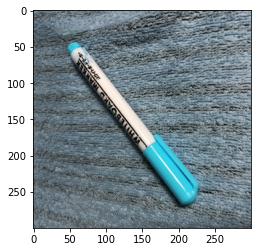

In [9]:
img = cv2.imread('./png_resize/IMG_0047.png')
plt.imshow(img)